In [5]:
from pathlib import Path
import sys
import copy
from torchvision import datasets
import math
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from tqdm import tqdm, trange
import numpy as np
import time

In [6]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

data_root = project_root / "data"
data_root.mkdir(parents=True, exist_ok=True)

In [7]:
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

from utils.utils import set_seed

set_seed()

from utils.utils import save_model
from models.simple_cnn import load_model_cnn, init_model_cnn
from utils.train_test_metrics import test_model, show_metrics
from methods.naive.naive_utils import recreate_dataloaders

Device used: cuda


In [8]:
BATCH_SIZE = 2048
MINI_BATCH_SIZE = 2048

EPS = 1e-4
MAX_NORM = 1  # 0.5
CG_ITERS = 10
SCALE = 10

In [12]:
naive_results_path = project_root / "results/mnist/naive"
results_path = project_root / "results/mnist/influence"

model_file = naive_results_path / "CNN_MNIST_model.pth"
samples_to_unlearn_file = (
    naive_results_path / "mnist_samples_to_unlearn_30per.json"
)
remaining_dataset_file = (
    naive_results_path / "updated_mnist_data_splits.json"
)


In [13]:
original_model, original_model_name, criterion, _optimizer, transform = load_model_cnn(
    model_pth_path=model_file
)

model_to_unlearn = copy.deepcopy(original_model)
model_to_unlearn_name = "influence_" + original_model_name

Load model...
Init model...
Done initializing model.
Model ID: 2246970389360, Optimizer ID: 2246972233840, Criterion ID: 2246972233744
Done loading model.


In [14]:
test_dataset = datasets.MNIST(
    root=data_root, train=False, transform=transform, download=True
)

In [15]:
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
classes = test_dataset.classes

In [16]:
model, *_ = init_model_cnn()

Init model...
Done initializing model.
Model ID: 2246284572176, Optimizer ID: 2246972233168, Criterion ID: 2246972231632


In [17]:
model_path = results_path / f"{model_to_unlearn_name}_model.pth"

In [18]:
test_model(model, model_to_unlearn_name, model_path, test_loader, results_path=results_path)

Loading and testing model: influence_CNN_MNIST


Evaluating model: D:\Unlearning\results\mnist\influence\influence_CNN_MNIST_model.pth: 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

Predictions and labels saved to influence_CNN_MNIST_predictions.json


Metrics for influence_CNN_MNIST:
  - Test Accuracy: 0.6990
  - Precision: 0.9038
  - Recall: 0.6990
  - F1 Score: 0.7201


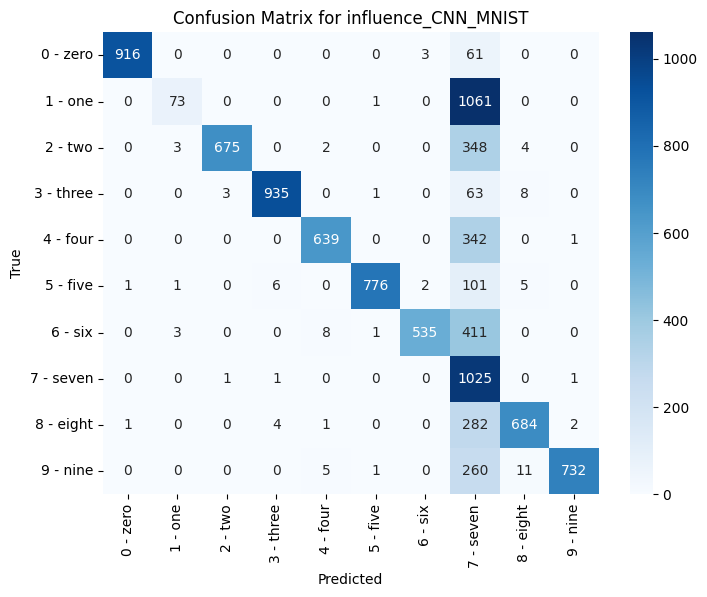

In [19]:
predictions_path = results_path / f"{model_to_unlearn_name}_predictions.json"
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_to_unlearn_name)